# Forest Fire Prediction

### Data Description and Cleaning

Import Libraries

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [194]:
df = pd.read_csv('ForestFire.csv')
df['Fire Occurrence'] = df['Fire Occurrence'].replace([0,1],['Safe','Fire'])

DataFrame Shape

In [195]:
df.shape

(39, 5)

Sample

In [196]:
df.sample(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
11,Yorkshire,30,39,100,Safe
8,Ecuador,60,32,19,Fire
5,Cairo,50,15,30,Safe
0,Jharkand,40,45,20,Fire
20,Ahmedabad,32,37,21,Fire


Description

In [197]:
df.describe()

,Oxygen,Temperature,Humidity
count,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051
std,23.734872,16.225677,28.046905
min,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000
50%,30.000000,35.000000,30.000000
75%,50.000000,45.000000,62.500000
max,89.000000,60.000000,100.000000


NaN Value Count

In [198]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

###### Hence no missing value analysis required

DataFrame Split

In [199]:
X = df
Y = df['Fire Occurrence']
X.drop(['Area','Fire Occurrence'],inplace=True,axis=1)

### Train-Test Split

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

### Exploratory Analysis

Correlation Analysis

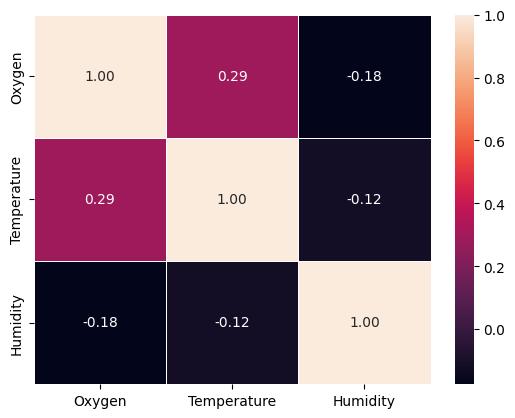

In [201]:
sb.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

### Model Building

#### K-Neighbors Classifier

In [202]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_model = (None,0)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

Predicted Accuracy: 75.0%


Prediction

In [203]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

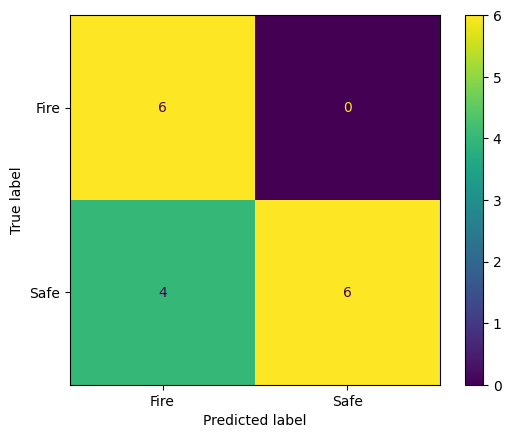

In [204]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [205]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

Predicted Accuracy: 87.5%


Predict

In [206]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Decision Tree Plot

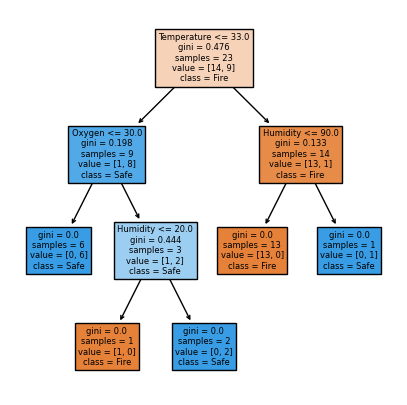

In [207]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
plt.show()

Confusion Matrix

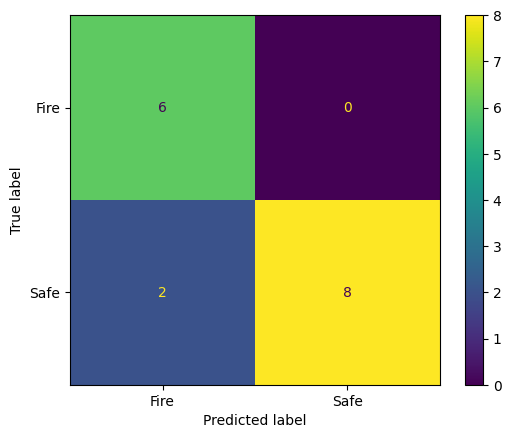

In [208]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [209]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

Predicted Accuracy: 100.0%


Predict

In [210]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

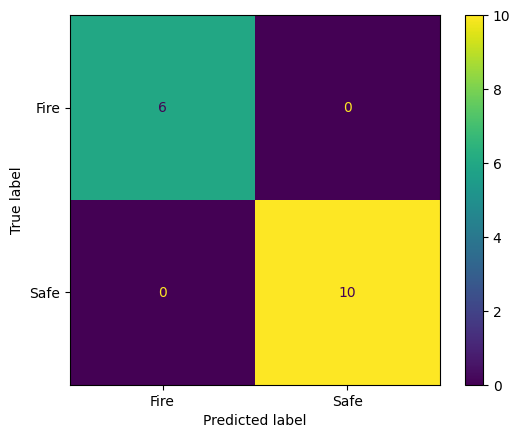

In [211]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

### XGBoost

Model

In [212]:
from xgboost import XGBClassifier
y_train = Y_train.replace(['Safe','Fire'],[0,1])
y_test = Y_test.replace(['Safe','Fire'],[0,1])
model = XGBClassifier()
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(y_test, Y_predict).round(3)*100}%")
if accuracy_score(y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

Predicted Accuracy: 93.8%


### Pickling

In [213]:
import pickle

print("Best Model: ",best_model[0], "\nBest Accuracy: ",best_model[1])

with open('fire/model','wb') as f:
    pickle.dump(best_model[0],f)

Best Model:  RandomForestClassifier(n_estimators=200) 
Best Accuracy:  1.0
